In [7]:
!pip3 install surprise

In [0]:
import surprise
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from tqdm import tqdm_notebook
import sys
import os
from matplotlib import pyplot as plt

%matplotlib inline

In [0]:
path = './gdrive/My Drive/GitHub/Weather Competition/'

In [0]:
hnb = pd.read_csv(path+'data/korea_hnb.csv').iloc[:,1:]

In [0]:
hnb.columns = list(i.split('.')[1] for i in hnb.columns)

In [5]:
hnb.head()

,bor_nm,sale_dt,gen_cd,age_cd,category,qty
0,종로구,20160101,F,20~39,립컬러,73
1,종로구,20160101,F,20~39,립케어,219
2,종로구,20160101,F,20~39,마스크팩,657
3,종로구,20160101,F,20~39,바디로션,328
4,종로구,20160101,F,20~39,체중조절,109


In [0]:
segmentation = pd.DataFrame({'segmentation' : [hnb['bor_nm'][i]+' '+hnb['gen_cd'][i]+' '+hnb['age_cd'][i] for i in range(len(hnb))]})

In [0]:
df_body = pd.concat([hnb['sale_dt'],segmentation,hnb['category'],hnb['qty']], axis=1) 

In [8]:
len(df_body)

820274

In [0]:
tmp = df_body[df_body['sale_dt']==20160101].iloc[:,1:]

In [10]:
tmp.head()

,segmentation,category,qty
0,종로구 F 20~39,립컬러,73
1,종로구 F 20~39,립케어,219
2,종로구 F 20~39,마스크팩,657
3,종로구 F 20~39,바디로션,328
4,종로구 F 20~39,체중조절,109


In [0]:
df_table = tmp.set_index(["segmentation", "category"]).unstack()

In [28]:
df_table.head(10).fillna('')

qty                                               
category       네일  립컬러  립케어  마스크팩 바디로션  선케어 제모제 체중조절 크림로션 훼이셜클렌저
segmentation                                                    
강남구 F 20~39   255   36   73    36   36                          
강북구 F 00~19         36              36                          
강북구 F 20~39                    36   36                 36     73
강북구 M 20~39                        109                 73     73
강서구 F 00~19         36         73   36            36            
강서구 F 20~39   182  292  511  3138  547  109      255  547    401
강서구 F 40~59    73  109         73  219            73  146     36
강서구 M 20~39             109   401  146                109    109
계양구 F 20~39         73   73  1642   36                 73    109
계양구 F 40~59                    36

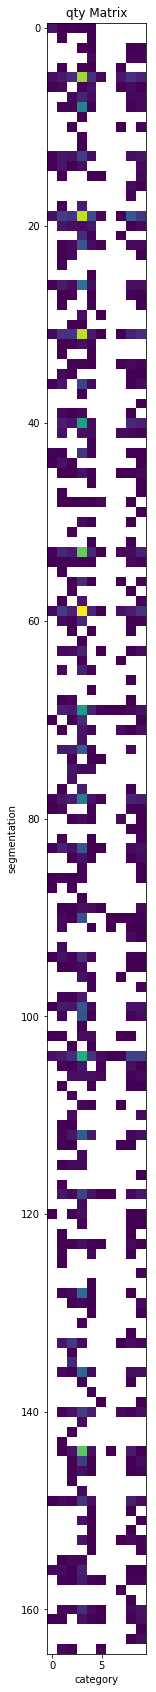

In [27]:
plt.figure(figsize=(700,30))
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("category")
plt.ylabel("segmentation")
plt.title("qty Matrix")
plt.show()

---

In [0]:
def seasonal_split(df,season):
  
  spring_start = '20180301'
  summer_start = '20180601'
  autumn_start = '20180901'
  winter_start = '20181201'
  
  for dt in df_body['sale_dt']:
    if season == 'spring':
      tmp = df[(str(dt) >= spring_start) & (str(dt) < summer_start)]
    elif season == 'summer':
      tmp = df[(str(dt)>= summer_start)& (str(dt) < autumn_start)]
    elif season == 'spring':
      tmp = df[(str(dt) >= autumn_start) & (str(dt) < winter_start)]
    else:
      tmp = df[(str(dt) >= winter_start) or (str(dt) < spring_start)]
  
  return tmp


In [0]:
body_summer = seasonal_split(df_body,'summer')

KeyError: ignored

,bor_nm,sale_dt,gen_cd,age_cd,category,qty
0,종로구,20160101,F,20~39,립컬러,73
